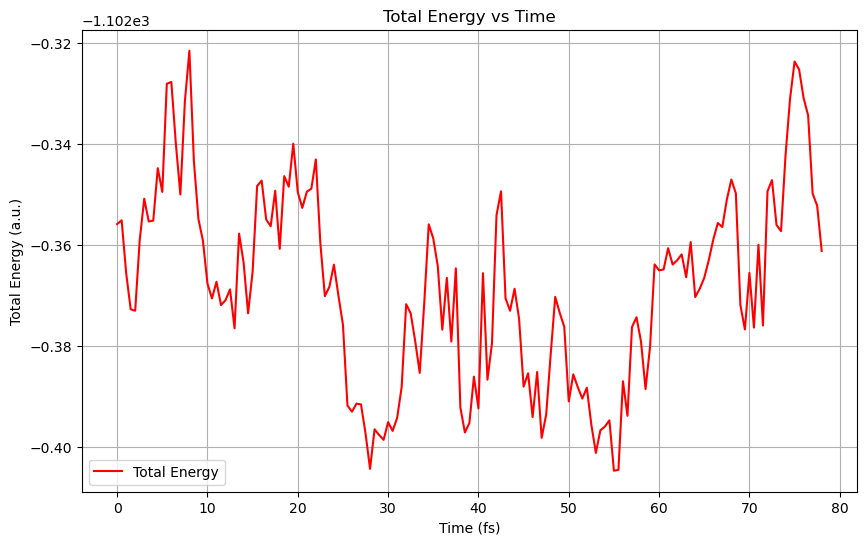

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF

# === Energy vs Time ===
# File containing energy data
energy_file = "water_aimd_1ns_every0.5fs-1.ener"

# Load the energy data
energy_data = pd.read_csv(
    energy_file,
    delim_whitespace=True,
    comment='#',
    names=[
        "Step", "Time (fs)", "Kin Energy (a.u.)", "Temperature (K)",
        "Pot Energy (a.u.)", "Cons Qty (a.u.)", "Used Time (s)"
    ]
)

# Plot Total Energy vs Time
total_energy = energy_data["Pot Energy (a.u.)"] + energy_data["Kin Energy (a.u.)"]
plt.figure(figsize=(10, 6))
plt.plot(energy_data["Time (fs)"], total_energy, label="Total Energy", color="red")
plt.title("Total Energy vs Time")
plt.xlabel("Time (fs)")
plt.ylabel("Total Energy (a.u.)")
plt.grid(True)
plt.legend()
plt.show()



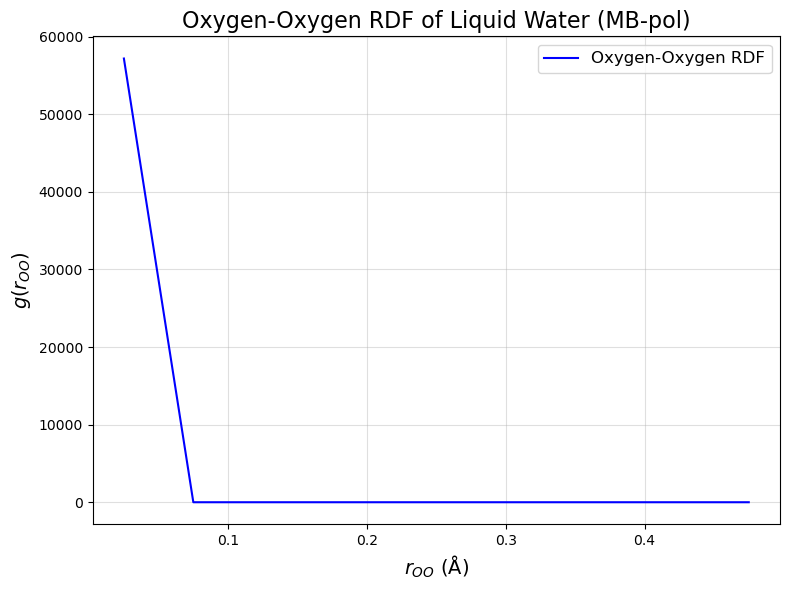

In [18]:
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt

# 输入轨迹文件及其盒子大小
xyz_file = "water.xyz"  # 替换为你的水轨迹文件名
box_size = [12.42, 12.42, 12.42]  # 模拟盒子大小（单位为 Å）

# 加载轨迹
u = mda.Universe(xyz_file, format="XYZ")
u.dimensions = box_size + [90, 90, 90]  # 添加直角盒子的角度（90°）

# 选择氧原子
oxygen_atoms = u.select_atoms("name O")

# 设置 RDF 的计算范围和分辨率
rdf = InterRDF(oxygen_atoms, oxygen_atoms, range=(0, 0.5), nbins=10)
rdf.run()

# 绘制 RDF
plt.figure(figsize=(8, 6))
plt.plot(rdf.results.bins, rdf.results.rdf, label="Oxygen-Oxygen RDF", color="blue", linestyle='-', linewidth=1.5)

# 设置标题、标签和图例
plt.xlabel(r"$r_{OO}$ ($\mathrm{\AA}$)", fontsize=14)
plt.ylabel(r"$g(r_{OO})$", fontsize=14)
plt.title("Oxygen-Oxygen RDF of Liquid Water (MB-pol)", fontsize=16)
plt.grid(alpha=0.4)
plt.legend(fontsize=12)
plt.tight_layout()

# 保存和展示图像
plt.show()
